# Import libraries and data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

C:\Users\carso\Anaconda3\envs\tflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Investigate data

In [3]:
print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)

print(train_labels)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[9 0 0 ... 3 0 5]


In [4]:
class_names = dict(zip(range(10),
                       ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                        "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]))
print(class_names)

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


# Preprocess the data

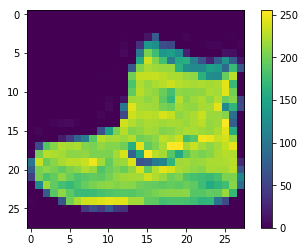

<function matplotlib.pyplot.cla()>

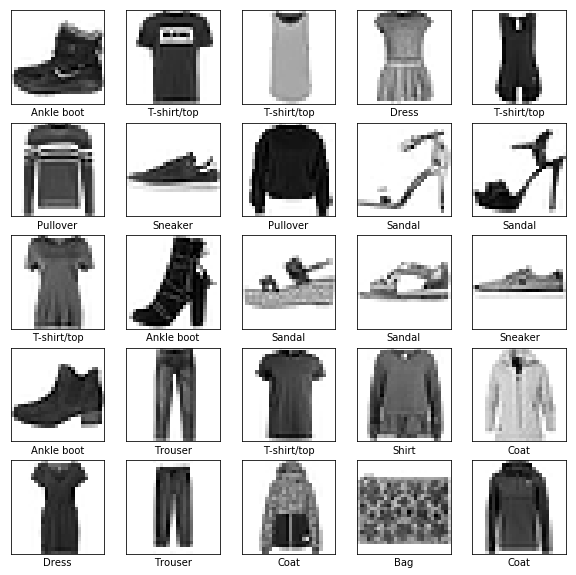

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
plt.cla

# Scale the data
train_images.setflags(write=1)
test_images.setflags(write=1)
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.cla
    

# Build the model

## Set up layers

In [6]:
model = keras.Sequential([
    # Flatten the input layer to 28 * 28 = 784
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Compile the model
The model needs the following settings:
- Loss function: how accurate the model is (this function is used to steer the model)
- Optimizer: how the model is updated
- Metrics: monitors training and testing steps

In [7]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train the model

In [8]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.4960 - acc: 0.8261
Epoch 2/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.3763 - acc: 0.8647
Epoch 3/5
60000/60000 [==============================] - 2s 32us/step - loss: 0.3379 - acc: 0.8766
Epoch 4/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.3132 - acc: 0.8861
Epoch 5/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.2956 - acc: 0.8917


# Evaluate accuracy

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy: {}".format(test_acc))

10000/10000 [==============================] - 0s 15us/step
Test accuracy: 0.8775


# Make predictions

In [10]:
predictions = model.predict(test_images)
print("Test example 1\nPredictions: {}\nSum of predictions: {}".format(predictions[0], np.sum(predictions[0])))
print("Class prediction: {}".format(np.argmax(predictions[0])))
print("Actual label: {}".format(test_labels[0]))

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                          100 * np.max(predictions_array),
                                          class_names[true_label]),
               color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

Test example 1
Predictions: [8.3675932e-06 3.4326598e-07 1.6464610e-06 1.3514324e-06 3.0042500e-07
 3.6335005e-03 4.5385391e-06 7.8401022e-02 2.6074820e-06 9.1794628e-01]
Sum of predictions: 0.9999999403953552
Class prediction: 9
Actual label: 9


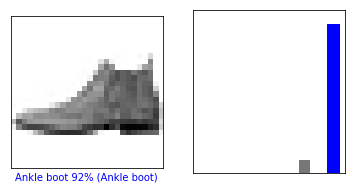

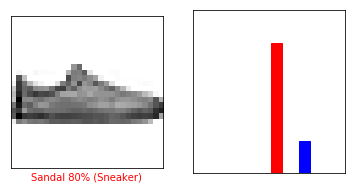

In [11]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)

i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)

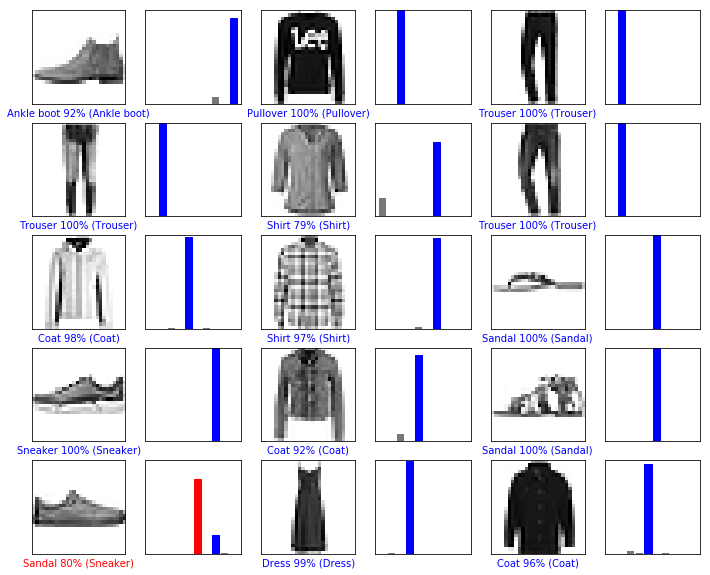

In [12]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)

(28, 28)
(1, 28, 28)
[[8.3676168e-06 3.4326729e-07 1.6464641e-06 1.3514324e-06 3.0042500e-07
  3.6335005e-03 4.5385477e-06 7.8401022e-02 2.6074845e-06 9.1794628e-01]]
9


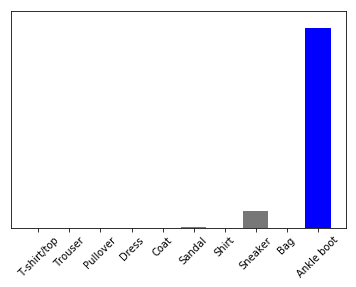

In [13]:
# make a prediction about a single image
img = test_images[0]
print(img.shape)
img = np.expand_dims(img, 0)
print(img.shape)

predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names.values(), rotation=45)

print(np.argmax(predictions_single[0]))